In [103]:
### Ericsson_ML_Challenge_MaterialType_Prediction

In [104]:
###!mkdir ~/.kaggle

In [105]:
###!cp /kaggle.json ~/.kaggle/

In [106]:
###!chmod 600 ~/.kaggle/kaggle.json

In [107]:
###! pip install kaggle

In [108]:
###!pip install keras-tuner

In [109]:
###!kaggle datasets download -d saranyashalya/ericsson-ml-challenge-materialtype-prediction

In [110]:
###! unzip /content/ericsson-ml-challenge-materialtype-prediction.zip

In [111]:
####! pip install tensorflow

In [112]:
###! pip install bayesian-optimization

In [113]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [114]:
##!pip install bayesian-optimization

In [115]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
#from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
###from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [116]:
# Import packages
# Basic packages

import pickle
from math import floor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Evaluation and bayesian optimization
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [117]:
train_data = pd.read_csv("/content/train_file.csv")

In [118]:
test_data = pd.read_csv("/content/test_file.csv")

In [119]:
print(train_data.shape, test_data.shape)

(31653, 12) (21102, 11)


In [120]:
train_data.columns

Index(['ID', 'UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth',
       'Checkouts', 'Title', 'Creator', 'Subjects', 'Publisher',
       'PublicationYear', 'MaterialType'],
      dtype='object')

In [121]:
train_data.head(3)

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK


In [122]:
train_data["MaterialType"].value_counts()

BOOK         21707
SOUNDDISC     4149
VIDEOCASS     2751
VIDEODISC     1420
SOUNDCASS     1020
MIXED          347
MUSIC          165
CR              94
Name: MaterialType, dtype: int64

In [123]:
test_data["MaterialType"] = 0

In [124]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

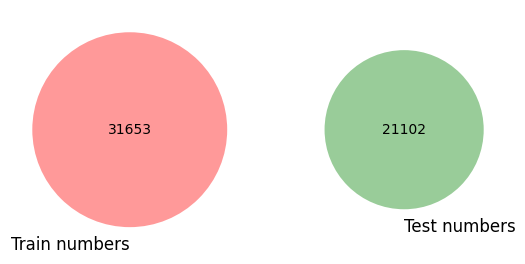

In [125]:
set_numbers_train = set(train_data[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
set_numbers_test = set(test_data[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
venn2((set_numbers_train, set_numbers_test), set_labels = ('Train numbers', 'Test numbers'))

### The above data explains the `size` of train and test data.

In [126]:
train_data.columns

Index(['ID', 'UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth',
       'Checkouts', 'Title', 'Creator', 'Subjects', 'Publisher',
       'PublicationYear', 'MaterialType'],
      dtype='object')

In [127]:
num_var = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(train_data[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in train_data.columns if feature not in num_var]

In [128]:
print("The Numerical Variables are :", num_var)
print("The Discreate Variables are :", discrete_var)
print("The Continuous Variables are :", cont_var)
print("The Categorical Variables are :", categ_var)

The Numerical Variables are : ['ID', 'CheckoutYear', 'CheckoutMonth', 'Checkouts']
The Discreate Variables are : ['CheckoutYear', 'CheckoutMonth']
The Continuous Variables are : ['ID', 'Checkouts']
The Categorical Variables are : ['UsageClass', 'CheckoutType', 'Title', 'Creator', 'Subjects', 'Publisher', 'PublicationYear', 'MaterialType']


### CHECKING `NULL VALUES` OR NOT

In [129]:
train_data.isnull().sum()

ID                     0
UsageClass             0
CheckoutType           0
CheckoutYear           0
CheckoutMonth          0
Checkouts              0
Title                  0
Creator            23137
Subjects            1763
Publisher          21916
PublicationYear    21931
MaterialType           0
dtype: int64

In [130]:
train_data = train_data.fillna(0)

In [131]:
train_data.isnull().sum()

ID                 0
UsageClass         0
CheckoutType       0
CheckoutYear       0
CheckoutMonth      0
Checkouts          0
Title              0
Creator            0
Subjects           0
Publisher          0
PublicationYear    0
MaterialType       0
dtype: int64

In [132]:
test_data = test_data.fillna(0)

### CATEGORICAL   VARIABLES

In [133]:
train_data.columns

Index(['ID', 'UsageClass', 'CheckoutType', 'CheckoutYear', 'CheckoutMonth',
       'Checkouts', 'Title', 'Creator', 'Subjects', 'Publisher',
       'PublicationYear', 'MaterialType'],
      dtype='object')

In [134]:
train_data["MaterialType"].value_counts()

BOOK         21707
SOUNDDISC     4149
VIDEOCASS     2751
VIDEODISC     1420
SOUNDCASS     1020
MIXED          347
MUSIC          165
CR              94
Name: MaterialType, dtype: int64

### (0: 'BOOK', 1: 'CR', 2: 'MIXED', 3: 'MUSIC', 4: 'SOUNDCASS', 5: 'SOUNDDISC', 6: 'VIDEOCASS', 7: 'VIDEODISC'}

In [135]:
c = train_data["MaterialType"].astype('category')
d = dict(enumerate(c.cat.categories))
print(d)

{0: 'BOOK', 1: 'CR', 2: 'MIXED', 3: 'MUSIC', 4: 'SOUNDCASS', 5: 'SOUNDDISC', 6: 'VIDEOCASS', 7: 'VIDEODISC'}


In [136]:
train_data['MaterialType'] = train_data.MaterialType.astype('category').cat.codes

### Analysis For `Numerical` Variables

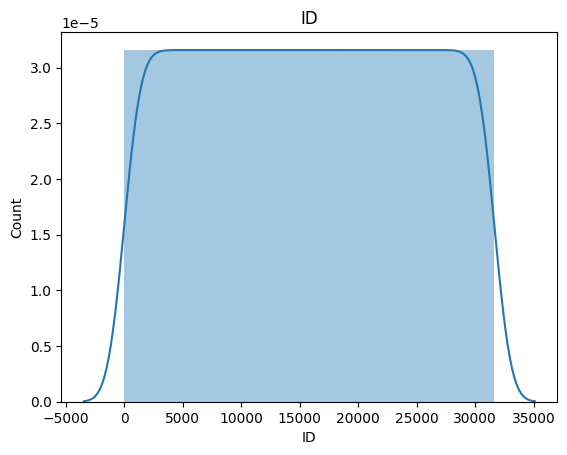

<Figure size 300x300 with 0 Axes>

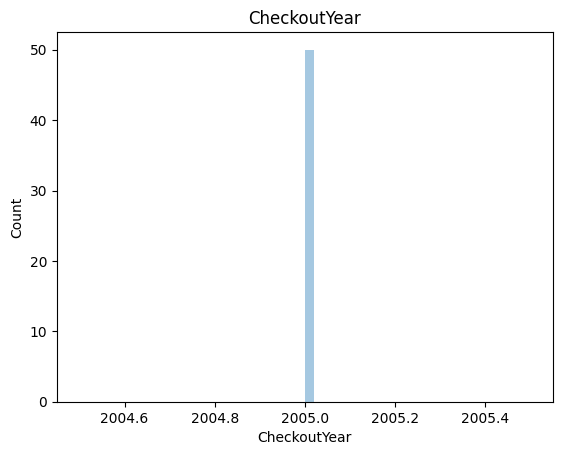

<Figure size 300x300 with 0 Axes>

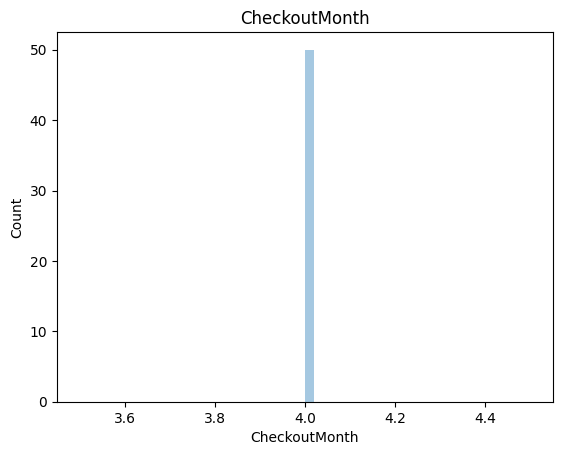

<Figure size 300x300 with 0 Axes>

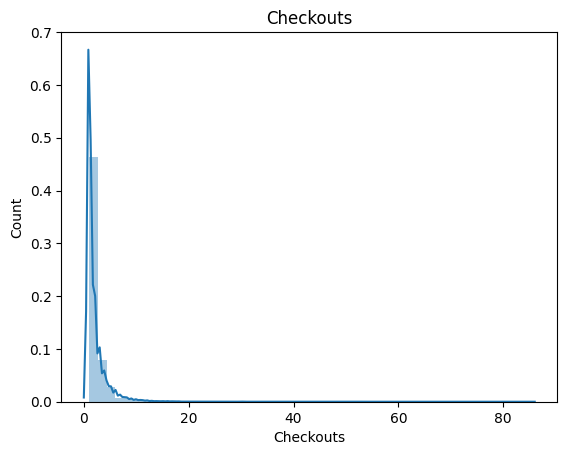

<Figure size 300x300 with 0 Axes>

In [137]:
#import seaborn as sns
#import matplotlib.pyplot as plt

for feature in num_var:
  data=train_data.copy()
  sns.distplot(train_data[feature])
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.figure(figsize=(3,3))
  plt.show()

In [138]:
train_data.head(3)

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,0,"Tsunamis, Tsunamis Juvenile literature",0,0,0
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",0,"Viking,",1998.,0
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,0


In [139]:
####! pip install klib

#### Using KLIB Library

In [140]:
import klib

In [141]:
train_data = klib.clean_column_names(train_data)

In [142]:
test_data = klib.clean_column_names(test_data)

In [143]:
train_data = klib.convert_datatypes(train_data)
test_data = klib.convert_datatypes(test_data)

In [144]:
train_data = klib.mv_col_handling(train_data)
test_data = klib.mv_col_handling(test_data)

In [145]:
train_data.dtypes

id                     int16
usage_class         category
checkout_type       category
checkout_year          int16
checkout_month          int8
checkouts               int8
title                 string
creator               object
subjects              object
publisher             object
publication_year    category
material_type           int8
dtype: object

### Data Conversion

In [146]:
train_data.head(2)

,id,usage_class,checkout_type,checkout_year,checkout_month,checkouts,title,creator,subjects,publisher,publication_year,material_type
0,1,Physical,Horizon,2005,4,1,Tidal wave,0,"Tsunamis, Tsunamis Juvenile literature",0,0,0
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",0,"Viking,",1998.,0


In [147]:
train_data["usage_class"] = train_data["usage_class"].astype('category').cat.codes
test_data["usage_class"] = test_data["usage_class"].astype('category').cat.codes
train_data["checkout_type"] = train_data["checkout_type"].astype('category').cat.codes
test_data["checkout_type"] = test_data["checkout_type"].astype('category').cat.codes


In [148]:
train_data.dtypes

id                     int16
usage_class             int8
checkout_type           int8
checkout_year          int16
checkout_month          int8
checkouts               int8
title                 string
creator               object
subjects              object
publisher             object
publication_year    category
material_type           int8
dtype: object

In [149]:
train_data.head(3)

,id,usage_class,checkout_type,checkout_year,checkout_month,checkouts,title,creator,subjects,publisher,publication_year,material_type
0,1,0,0,2005,4,1,Tidal wave,0,"Tsunamis, Tsunamis Juvenile literature",0,0,0
1,2,0,0,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",0,"Viking,",1998.,0
2,3,0,0,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,0


In [150]:
import re
def publication_year(s):
    '''
    '''
    k = re.findall(r'\d{4}', s)
    if len(k) != 0:
        try:
            k = sorted(k)[0]
            k = (pd.to_datetime('now').year - pd.to_datetime(k, format = '%Y').year)
        except:
            k = pd.period_range(start = k, end = '1678', freq = 'Y')
            k = len(k)
            k = (pd.to_datetime('now').year - pd.to_datetime('1678', format = '%Y').year + k)
    else:
        k = 0
    return k###train_data['publication_year'][:100]

In [151]:
train_data["publication_year"] = train_data["publication_year"].astype(str)

In [152]:
train_data["publication_year"] = train_data["publication_year"].apply(publication_year)

In [153]:
test_data["publication_year"] = test_data["publication_year"].astype(str)
test_data["publication_year"] = test_data["publication_year"].apply(publication_year)

In [154]:
train_data.head(2)

,id,usage_class,checkout_type,checkout_year,checkout_month,checkouts,title,creator,subjects,publisher,publication_year,material_type
0,1,0,0,2005,4,1,Tidal wave,0,"Tsunamis, Tsunamis Juvenile literature",0,0,0
1,2,0,0,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",0,"Viking,",25,0


In [155]:
###!pip install textblob

In [156]:
####! pip install pickle

In [157]:
import pandas, numpy, string, textblob
import pickle
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import xgboost
from keras import layers, models, optimizers
from keras.preprocessing import text, sequence
import matplotlib.pyplot as plt

In [158]:
import string
import re
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\d+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [159]:
train_data.columns

Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'creator', 'subjects', 'publisher',
       'publication_year', 'material_type'],
      dtype='object')

In [160]:
test_data.columns

Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'creator', 'subjects', 'publisher',
       'publication_year', 'material_type'],
      dtype='object')

In [161]:
train_data.isnull().sum()

id                  0
usage_class         0
checkout_type       0
checkout_year       0
checkout_month      0
checkouts           0
title               0
creator             0
subjects            0
publisher           0
publication_year    0
material_type       0
dtype: int64

In [162]:
train_data["title"] = train_data["title"].astype('string')
train_data["creator"] = train_data["creator"].astype('string')
train_data["subjects"] = train_data["subjects"].astype('string')
train_data["publisher"] = train_data["publisher"].astype('string')

In [163]:
test_data["title"] = test_data["title"].astype('string')
#test_data["creator"] = test_data["creator"].astype('string')
test_data["subjects"] = test_data["subjects"].astype('string')
#test_data["publisher"] = test_data["publisher"].astype('string')

In [164]:
train_data["title"] = train_data["title"].apply(lambda x: clean_text(x))
train_data["creator"] = train_data["creator"].apply(lambda x: clean_text(x))
train_data["subjects"] = train_data["subjects"].apply(lambda x: clean_text(x))
train_data["publisher"] = train_data["publisher"].apply(lambda x: clean_text(x))


In [165]:
test_data["title"] = test_data["title"].apply(lambda x: clean_text(x))
test_data["subjects"] = test_data["subjects"].apply(lambda x: clean_text(x))

In [166]:
train_data.drop(columns ="creator", inplace=True)
train_data.drop(columns = "publisher", inplace=True)

In [167]:
train_data.columns

Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'subjects', 'publication_year', 'material_type'],
      dtype='object')

### Data Visualization

GridSpec(6, 2)

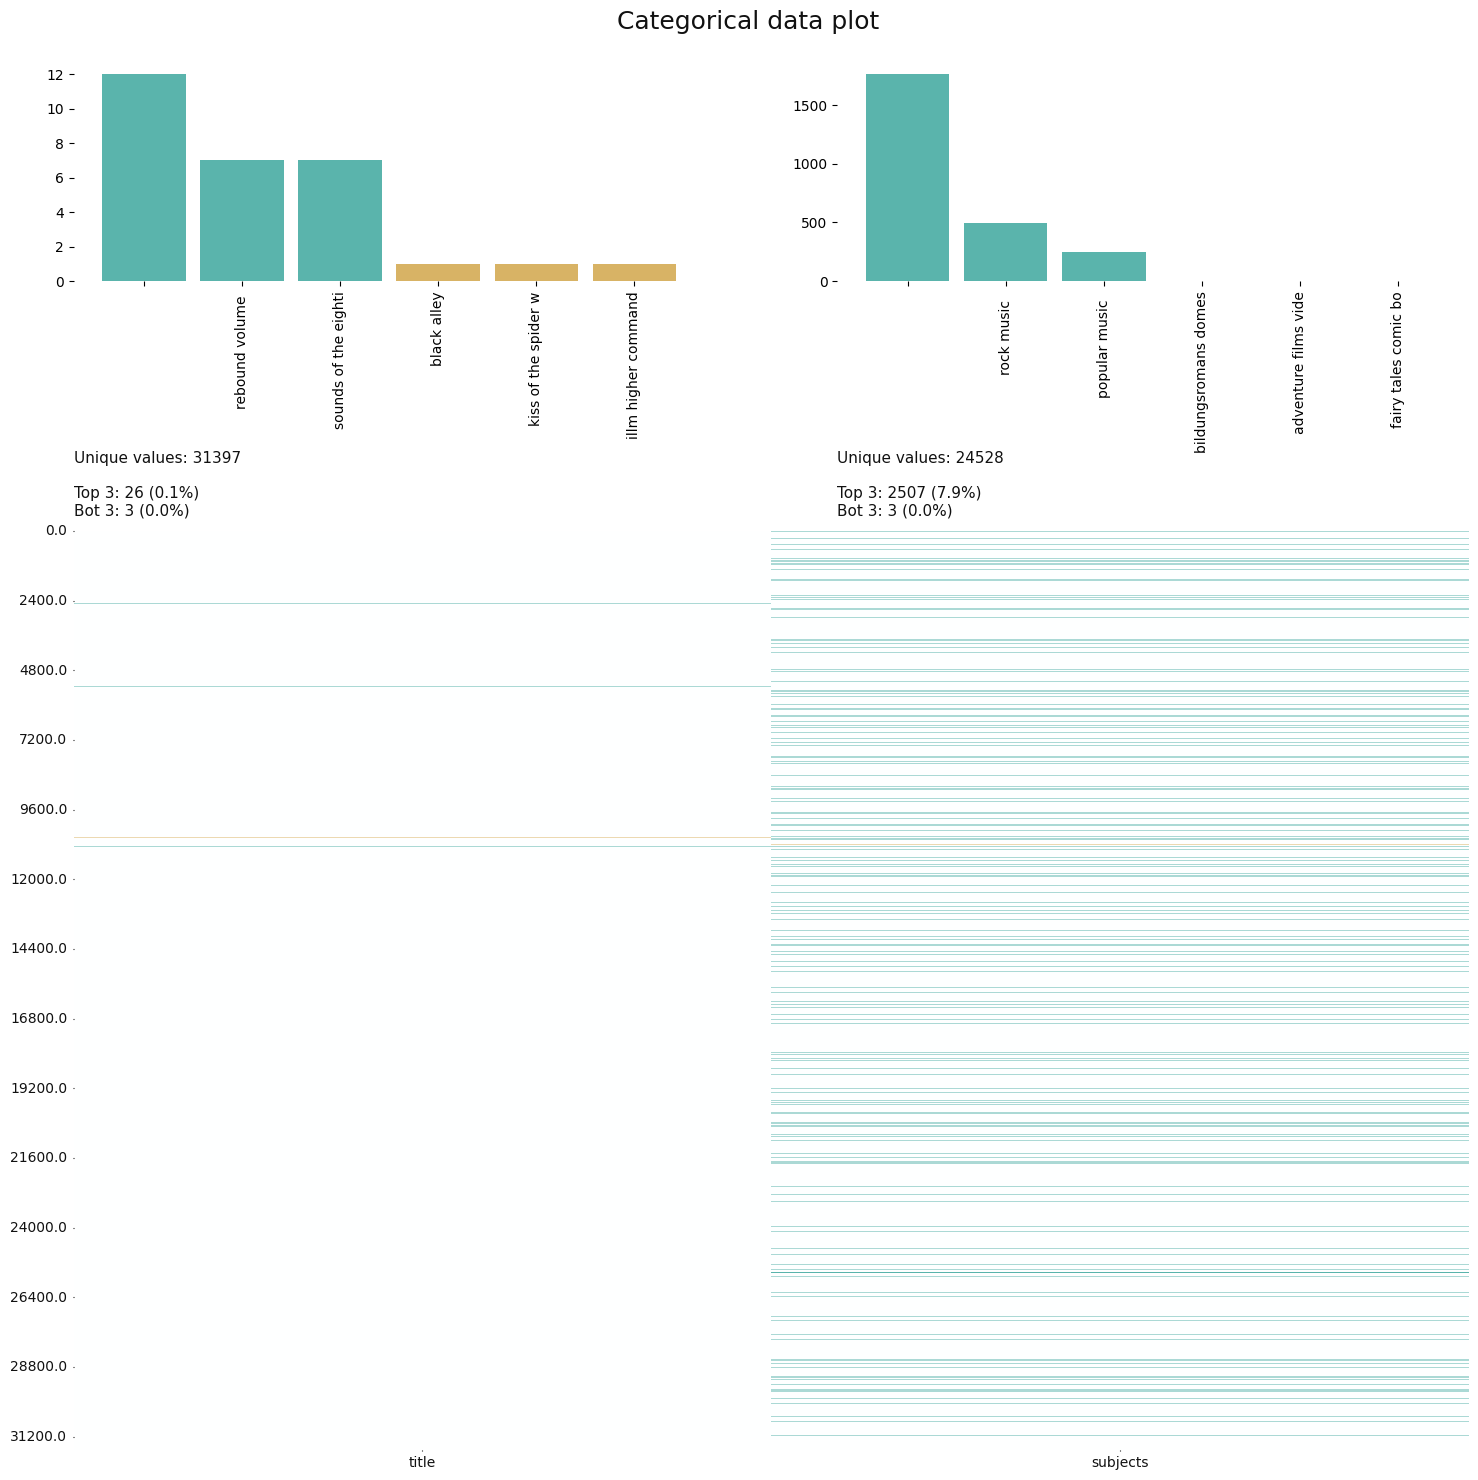

In [168]:
klib.cat_plot(train_data)

In [169]:
klib.corr_mat(train_data)

,id,usage_class,checkout_type,checkout_year,checkout_month,checkouts,publication_year,material_type
id,1.00,-,-,-,-,-0.01,0.01,-0.01
usage_class,-,-,-,-,-,-,-,-
checkout_type,-,-,-,-,-,-,-,-
checkout_year,-,-,-,-,-,-,-,-
checkout_month,-,-,-,-,-,-,-,-
checkouts,-0.01,-,-,-,-,1.00,0.02,0.24
publication_year,0.01,-,-,-,-,0.02,1.00,-0.19
material_type,-0.01,-,-,-,-,0.24,-0.19,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

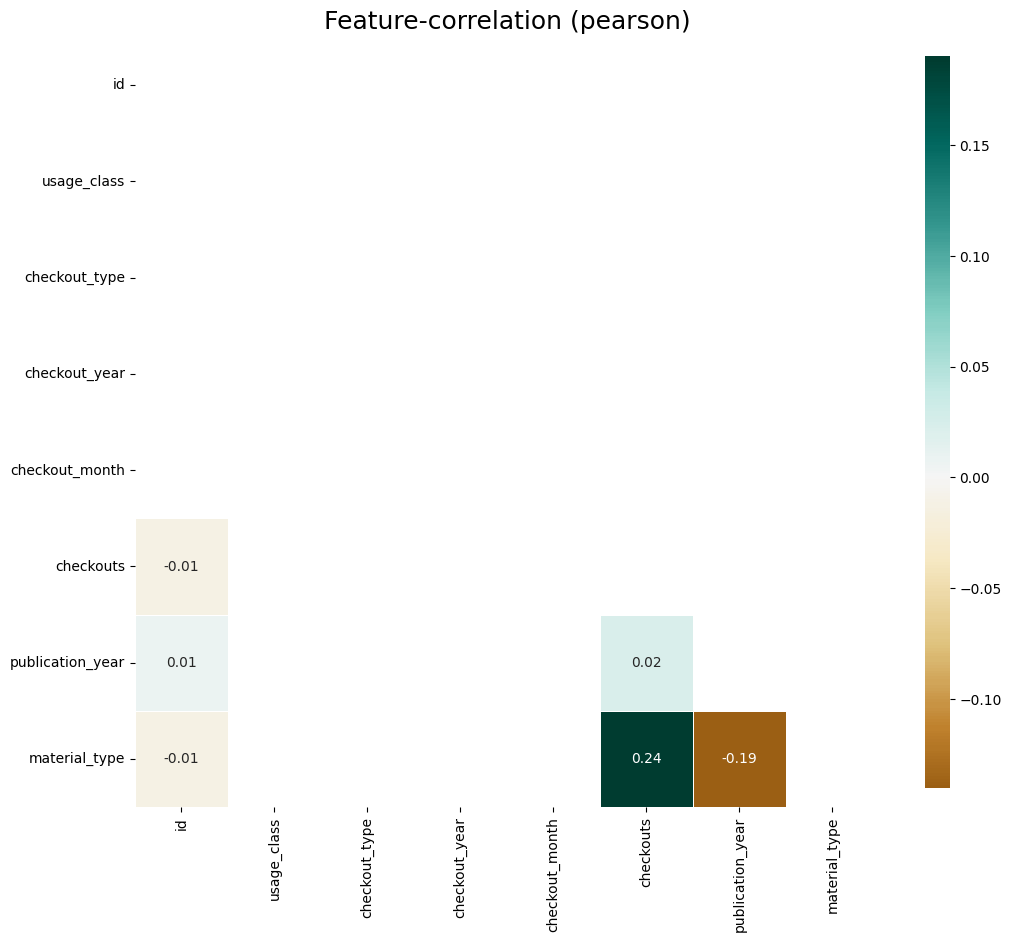

In [170]:
klib.corr_plot(train_data)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='id', ylabel='Density'>

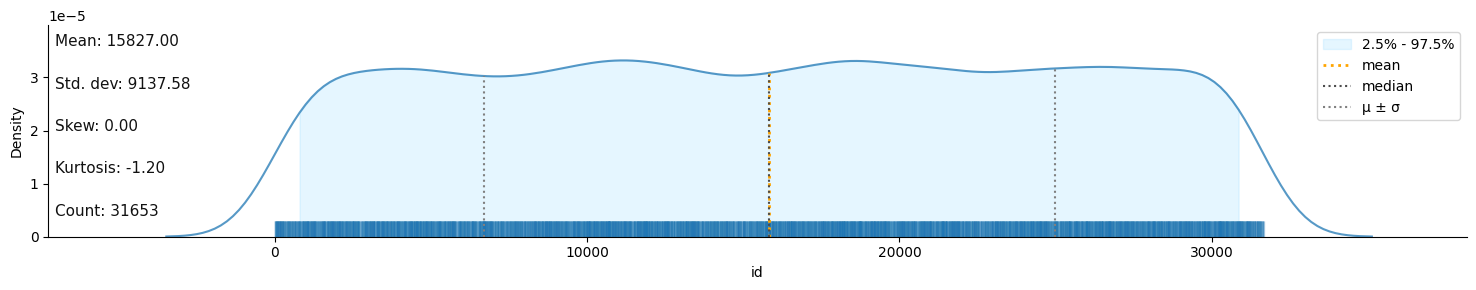

In [171]:
klib.dist_plot(train_data)

In [172]:
klib.missingval_plot(train_data)

No missing values found in the dataset.


In [173]:
test_data.columns

Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'creator', 'subjects', 'publisher',
       'publication_year', 'material_type'],
      dtype='object')

 ### Vectorization Of the Column Using `TF-IDF Vectorizer`


In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [175]:
MAX_WORDS = 200000
from tensorflow.keras.layers import TextVectorization

In [176]:
vectorizer = TextVectorization(max_tokens = MAX_WORDS,
output_sequence_length = 1800,
output_mode = 'int')


In [177]:
train_data.columns


Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'subjects', 'publication_year', 'material_type'],
      dtype='object')

In [178]:
vectorizer.adapt(train_data["subjects"].values)

In [179]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'fiction',
 'juvenile',
 'and',
 'literature',
 'music',
 'states',
 'united',
 'films',
 'history',
 'drama',
 'recordings',
 'for',
 'the',
 'biography',
 'stories',
 'video',
 'fictitious',
 'women',
 'character',
 'hearing',
 'impaired',
 'popular',
 'life',
 'books',
 'mystery',
 'etc',
 'feature',
 'new',
 'century',
 'of',
 'th',
 'american',
 'england',
 'childrens',
 'rock',
 'social',
 'in',
 'english',
 'language',
 'york',
 'songs',
 'jazz',
 'war',
 'travel',
 'guidebooks',
 'state',
 'americans',
 'comic',
 'african',
 'strips',
 'aspects',
 'poetry',
 'works',
 'love',
 'great',
 'customs',
 'science',
 'animals',
 'britain',
 'type',
 'large',
 'world',
 'manuals',
 'france',
 'psychological',
 'washington',
 'america',
 'relations',
 'historical',
 'description',
 'china',
 'children',
 'fantasy',
 'sound',
 'television',
 'psychology',
 'n',
 'family',
 'art',
 'indians',
 'folklore',
 'motion',
 'japan',
 'domestic',
 'north',
 'california',
 'friends

In [180]:
TrainvectorizedText = vectorizer(train_data["subjects"].values)


In [181]:
vectorizer.adapt(test_data["subjects"].values)

In [182]:
TestvectorizedText = vectorizer(test_data["subjects"].values)


In [183]:
import scipy


In [184]:
train_data.columns


Index(['id', 'usage_class', 'checkout_type', 'checkout_year', 'checkout_month',
       'checkouts', 'title', 'subjects', 'publication_year', 'material_type'],
      dtype='object')

In [185]:
Y_train = pd.get_dummies(train_data.material_type)
Y_test = pd.get_dummies(test_data.material_type)


In [186]:
import tensorflow as tf

In [187]:
#MCSHBAP - map, cache, suffle, batch, prefetch
dataset = tf.data.Dataset.from_tensor_slices((TrainvectorizedText, Y_train))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) #helps bottleneck


In [188]:
dataset.as_numpy_iterator().next()


(array([[  26,    2,  331, ...,    0,    0,    0],
        [ 202, 2153,  178, ...,    0,    0,    0],
        [5063,   82,    3, ...,    0,    0,    0],
        ...,
        [3164, 1383,    2, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [  19,   15, 3038, ...,    0,    0,    0]]),
 array([[1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8))

In [189]:
batch_x, batch_y = dataset.as_numpy_iterator().next()


In [190]:
batch_x
batch_x.shape
batch_y.shape

(16, 8)

In [191]:
len(train_data)


31653

In [192]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [193]:
len(train)

1385

In [194]:
train_generator = train.as_numpy_iterator()


In [195]:
train_generator.next()


(array([[ 7323,  4821,    18, ...,     0,     0,     0],
        [    8,     7,    10, ...,     0,     0,     0],
        [   99,     0,     0, ...,     0,     0,     0],
        ...,
        [ 1820,  1600,   264, ...,     0,     0,     0],
        [10517,   473,    45, ...,     0,     0,     0],
        [11367,  4158,     0, ...,     0,     0,     0]]),
 array([[1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0]], dtype=uint8))

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Embedding, Dense


In [197]:
model = Sequential()
# Creating the embedding layer
model.add(Embedding(MAX_WORDS+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(8, activation='sigmoid'))


In [198]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=['accuracy'])


In [199]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                      

In [200]:
import tensorflow as tf

In [201]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [202]:
model.fit(train, epochs=41, validation_data = val, callbacks=[es_callback])

Epoch 1/41
1385/1385 [==============================] - 158s 111ms/step - loss: 0.1375 - accuracy: 0.8242 - val_loss: 0.1047 - val_accuracy: 0.8578
Epoch 2/41
1385/1385 [==============================] - 141s 102ms/step - loss: 0.1016 - accuracy: 0.8644 - val_loss: 0.0900 - val_accuracy: 0.8699
Epoch 3/41
1385/1385 [==============================] - 142s 103ms/step - loss: 0.0894 - accuracy: 0.8751 - val_loss: 0.0815 - val_accuracy: 0.8858
Epoch 4/41
1385/1385 [==============================] - 143s 103ms/step - loss: 0.0835 - accuracy: 0.8796 - val_loss: 0.0699 - val_accuracy: 0.8986
Epoch 5/41
1385/1385 [==============================] - 139s 100ms/step - loss: 0.0759 - accuracy: 0.8905 - val_loss: 0.0647 - val_accuracy: 0.9005
Epoch 6/41
1385/1385 [==============================] - 138s 100ms/step - loss: 0.0706 - accuracy: 0.8963 - val_loss: 0.0611 - val_accuracy: 0.9054
Epoch 7/41
1385/1385 [==============================] - 139s 100ms/step - loss: 0.0659 - accuracy: 0.9039 - val_

In [205]:
#from matplotlib import pyplot as plt
#plt.figure(figsize=(15,12))
#pd.DataFrame(history.history).plot()
#plt.show()


In [206]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [207]:
model.evaluate(TrainvectorizedText)


990/990 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [208]:
Y_pred = (model.predict(TestvectorizedText) > 0.5).astype(int)

660/660 [==============================] - 30s 45ms/step


In [209]:
Y_pred
Y_pred = pd.DataFrame(Y_pred)


In [210]:
Y_pred.shape


(21102, 8)

In [211]:
##
output = {
    0: "BOOK",
    1: "CR",
    2: "MIXED" ,
    3: "MUSIC" ,
    4: "SOUNDCASS" ,
    5: "SOUNDDISC" ,
    6: "VIDEOCASS" ,
    7: "VIDEODISC"
}

In [212]:
Y_pred = pd.DataFrame(Y_pred)


In [213]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [214]:
new_Y_pred = Y_pred.idxmax(axis=1)

In [215]:
new_Y_test = Y_test.idxmax(axis=1)


In [216]:
new_Y_pred = pd.DataFrame(new_Y_pred)

In [217]:
new_Y_test = pd.DataFrame(new_Y_test)

In [218]:
new_Y_pred = new_Y_pred.rename(columns ={0: "PREDICT"} )


In [219]:
new_Y_test = new_Y_test.rename(columns ={0: "PREDICT"} )

In [220]:
print('Baseline: Accuracy: ', round(accuracy_score(new_Y_test, new_Y_pred)*100, 2))


Baseline: Accuracy:  77.54


In [221]:
new_Y_pred["PREDICT"] = new_Y_pred["PREDICT"].map(output)
new_Y_test["PREDICT"] = new_Y_test["PREDICT"].map(output)


In [222]:
new_Y_pred["PREDICT"].unique()


array(['BOOK', 'VIDEOCASS', 'SOUNDDISC', 'VIDEODISC', 'CR', 'SOUNDCASS',
       'MIXED', 'MUSIC'], dtype=object)

In [223]:
keys = ['BOOK', 'SOUNDDISC', 'SOUNDCASS', 'VIDEOCASS', 'VIDEODISC',
'MUSIC', 'CR', 'MIXED']
explode = [0, 0.3, 0.1, 0.1, 0.1, 0.4, 0.4, 0.1]


In [224]:
all = new_Y_pred["PREDICT"].value_counts()


In [227]:
new_Y_pred.to_csv("predict_nn.csv")

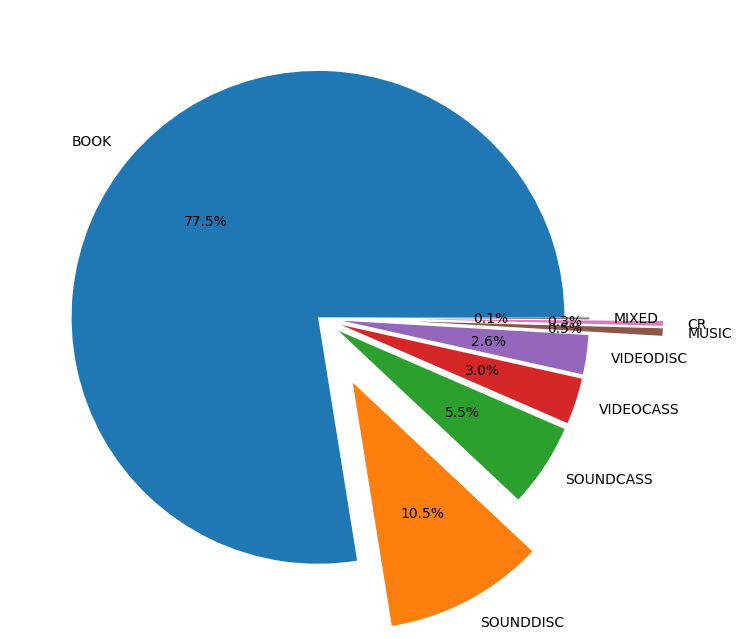

In [225]:
plt.figure(figsize = [15,8])
# plotting data on chart
plt.pie(all, labels=keys, explode=explode, autopct='%.1f%%')
# displaying chart
plt.show()